In [193]:
%matplotlib notebook

In [194]:
# This is final copy
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt # for Chart and plot
import math # for floor function 

plt.close("all")

# File to Load 
city_data_to_load = "raw_data/city_data.csv"
ride_data_to_load = "raw_data/ride_data.csv"

# Read City and Ride Data File and store into Pandas Data Frames
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# # Combine the data into a single dataset
city_ride_data_complete = pd.merge(city_data, ride_data, how="inner", on=["city", "city"])
# city_ride_data_complete

In [195]:
# Calculating $ Displaying Average Fare, date, Total Number of Rides, Total Number of Drivers based on City
rides_analysis = city_ride_data_complete
rides_analysis['rides'] = 0 
rides_analysis['drivers'] = 0
rides_analysis = rides_analysis.groupby(['city']).agg({'fare':'mean'
                                   ,'date':'min'
                                   , 'rides':'size'
                                   ,'driver_count':'max'               
                                   ,'type':'min'})
rides_analysis = rides_analysis.rename(columns = {'fare' :'Average Fare'
                                 ,'rides' : 'Total Number of Rides'
                                 , 'driver_count' : 'Total Number of Drivers'
                                 , 'type' : 'City Type'
                                })
# rides_analysis

In [196]:
# filter on Urban
Urban = rides_analysis[rides_analysis["City Type"].notnull() & (rides_analysis["City Type"] == "Urban")]
# len(Urban)
# Urban

In [197]:
# filter on Suburban
Suburban = rides_analysis[rides_analysis["City Type"].notnull() & (rides_analysis["City Type"] == "Suburban")]
# len(Suburban)
# Suburban

In [198]:
# Filter on Rural
Rural = rides_analysis[rides_analysis["City Type"].notnull() & (rides_analysis["City Type"] == "Rural")]
# len(Rural)
# Rural

In [199]:
# Find the max and min of the 'Average Fare' to plot on y axis
rides_fare_average_min = rides_analysis["Average Fare"].min()
rides_fare_average_min

20.093157894736848

In [200]:
# Find the max of the 'Average Fare' to plot on y axis
rides_fare_average_max = rides_analysis["Average Fare"].max()
rides_fare_average_max

43.278333333333336

In [201]:
# Find the max and min of the 'Total Number of Rides' to plot on x axis
Total_Number_of_Rides_min = rides_analysis["Total Number of Rides"].min()
Total_Number_of_Rides_min

3

In [202]:
# Find the max and min of the 'Total Number of Rides' to plot on x axis
Total_Number_of_Rides_max = rides_analysis["Total Number of Rides"].max()
Total_Number_of_Rides_max

39

In [203]:
# Create a list from 0 to 40 with each step being 0.1 higher than the last
x_axis = np.arange(0, Total_Number_of_Rides_max+6, 5)
x_axis

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40], dtype=int64)

In [204]:
# Create a list from 0 to 40 with each step being 0.1 higher than the last
y_axis = np.arange(math.floor( rides_fare_average_min ) - 5, math.floor(rides_fare_average_max) + 6, 5)
y_axis

array([15, 20, 25, 30, 35, 40, 45])

<IPython.core.display.Javascript object>


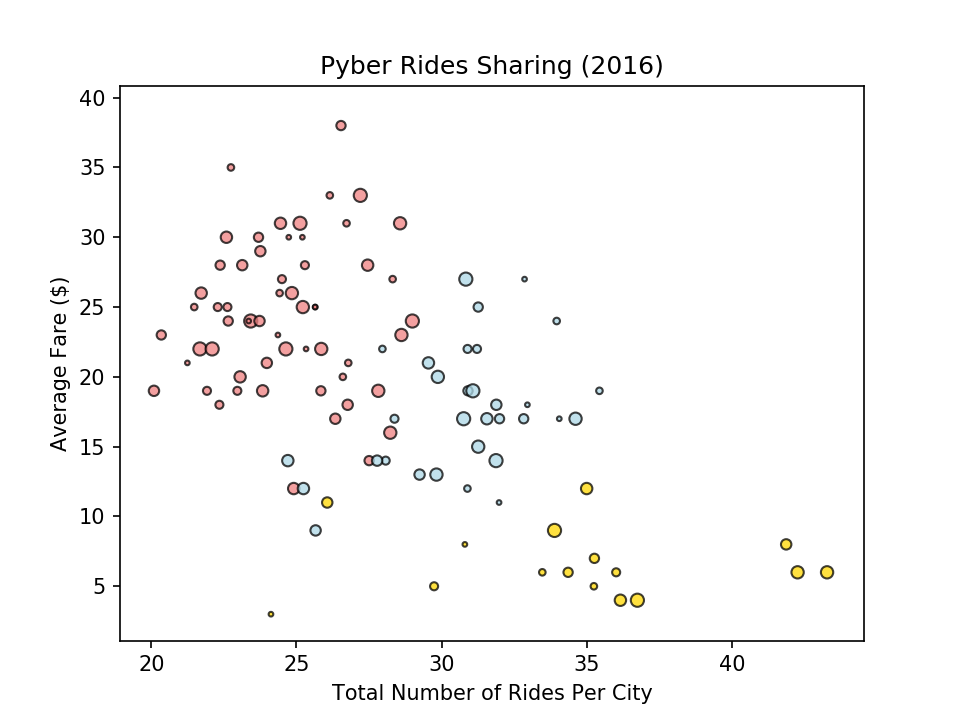

In [205]:
# Bubble Plot
plt.figure()
Urban = plt.scatter(Urban["Average Fare"],Urban["Total Number of Rides"], marker="o", facecolors="lightcoral", edgecolors="black",
            s = x_axis, alpha=0.75, label="Urban")
Suburban = plt.scatter(Suburban["Average Fare"],Suburban["Total Number of Rides"], marker="o", facecolors="lightblue", edgecolors="black",
            s = x_axis, alpha=0.75, label="Suburban")
Rural = plt.scatter(Rural["Average Fare"],Rural["Total Number of Rides"], marker="o", facecolors="gold", edgecolors="black",
            s = x_axis, alpha=0.75, label="Rural")
# interactive(True)
# plt.show()

In [191]:
# Create a legend for the chart
plt.legend(handles=[Urban,Suburban,Rural], loc="best")

In [206]:
# Add labels to the x and y axes
plt.title("Pyber Rides Sharing (2016)")
plt.xlabel("Total Number of Rides Per City")
plt.ylabel("Average Fare ($)")

Text(70.5833,0.5,'Average Fare ($)')

In [207]:
# Making the first Pie : % total "Average Fare" by "City Type"


<IPython.core.display.Javascript object>


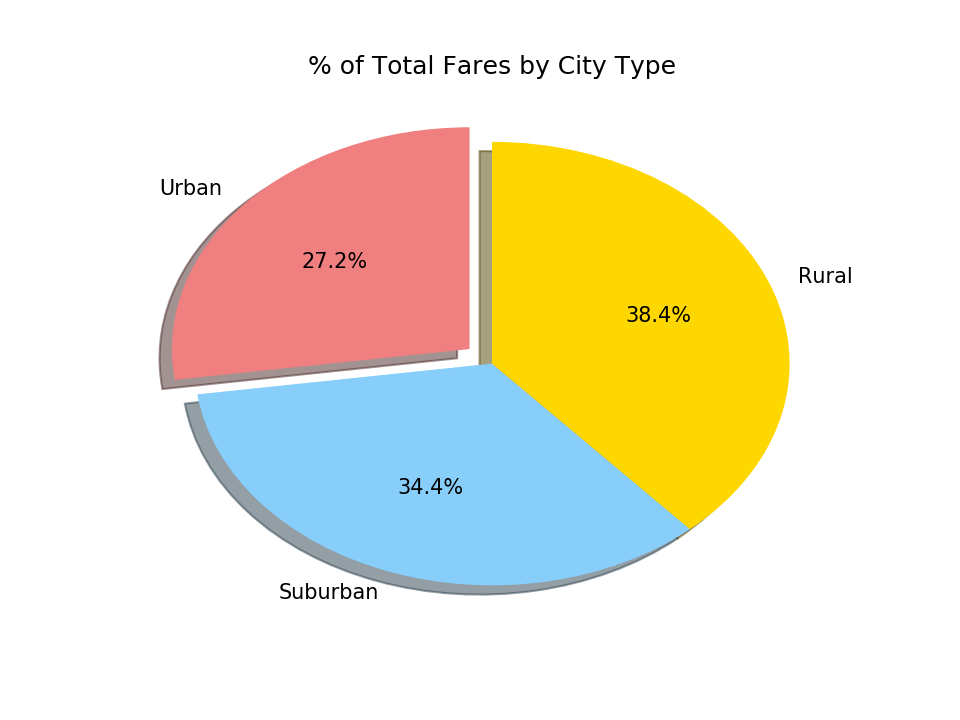

In [208]:
# Calculating $ Displaying Average Fare, date, Total Number of Rides, Total Number of Drivers based on City Type
plt.figure()

pie_analysis = city_ride_data_complete
pie_analysis['rides'] = 0 
pie_analysis['drivers'] = 0
pie_analysis = pie_analysis.groupby(['type']).agg({"fare":"mean"
                                   ,"date":"min"
                                   , "rides":"size"
                                   ,"driver_count":"max"               
                                   ,"type":"min"})
pie_analysis = pie_analysis.rename(columns = {"fare" :"Average Fare"
                                 ,"rides" : "Total Number of Rides"
                                 , "driver_count" : "Total Number of Drivers"
                                 , "type" : "City Type"
                                })
# pie_analysis

In [108]:
#
total_Avg_Fare = pie_analysis["Average Fare"].sum()
# total_Fare
total_urban_fare = pie_analysis[pie_analysis["City Type"].notnull() & (pie_analysis["City Type"] == "Urban")]
# total_urban_fare
total_Suburban_fare = pie_analysis[pie_analysis["City Type"].notnull() & (pie_analysis["City Type"] == "Suburban")]
# total_Suburban_fare
total_Rural_fare = pie_analysis[pie_analysis["City Type"].notnull() & (pie_analysis["City Type"] == "Rural")]
# total_Rural_fare
percent_urban_fare = total_urban_fare["Average Fare"] * 100 /total_Avg_Fare
# percent_urban_fare
percent_Suburban_fare = total_Suburban_fare["Average Fare"] * 100 /total_Avg_Fare
# percent_Suburban_fare
percent_Rural_fare = total_Rural_fare["Average Fare"] * 100 /total_Avg_Fare
# percent_Rural_fare


In [209]:
# Labels for the sections of our pie chart

labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [percent_urban_fare, percent_Suburban_fare, percent_Rural_fare]

# The colors of each section of the pie chart
colors = ["lightcoral", "lightskyblue", "gold"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

In [210]:
# Create the pie chart based upon the values above
# Automatically find the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("% of Total Fares by City Type")

Text(0.5,1,'% of Total Fares by City Type')

In [211]:
# Tells matplotlib that we want a pie chart with equal axes.
# plt.axis("equal")

In [212]:
# making second pie : % of "Total Number of Rides" by "City Type"

<IPython.core.display.Javascript object>


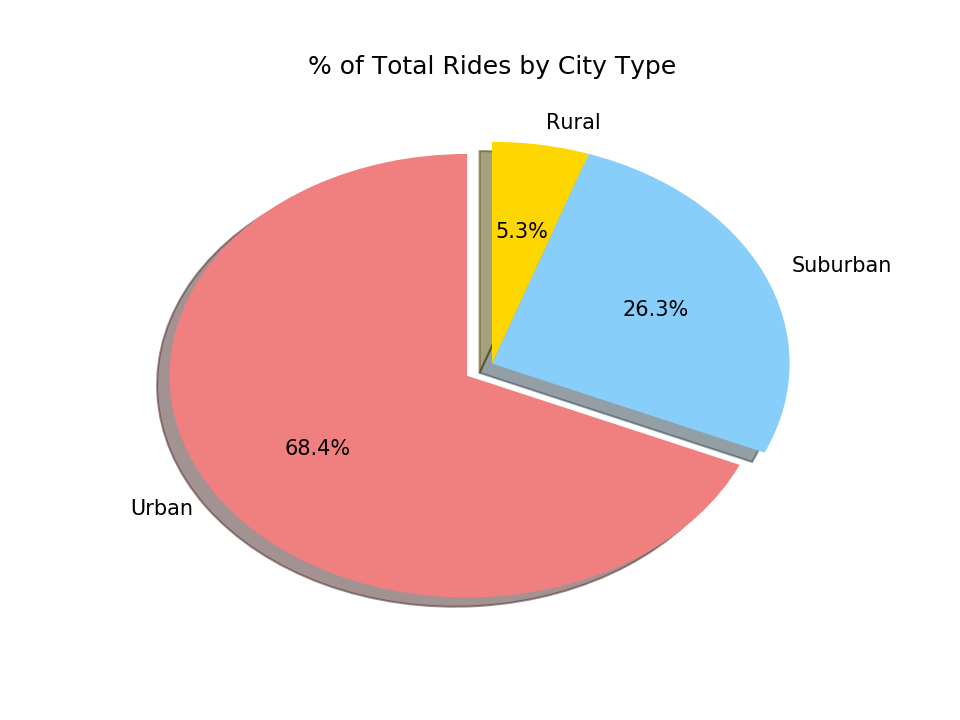

In [213]:
# Calculating $ Displaying Average Fare, date, Total Number of Rides, Total Number of Drivers based on City Type
plt.figure()

pie_analysis = city_ride_data_complete
pie_analysis['rides'] = 0 
pie_analysis['drivers'] = 0
pie_analysis = pie_analysis.groupby(['type']).agg({'fare':'mean'
                                   ,'date':'min'
                                   , 'rides':'size'
                                   ,'driver_count':'max'               
                                   ,'type':'min'})
pie_analysis = pie_analysis.rename(columns = {'fare' :'Average Fare'
                                 ,'rides' : 'Total Number of Rides'
                                 , 'driver_count' : 'Total Number of Drivers'
                                 , 'type' : 'City Type'
                                })
# pie_analysis

In [114]:
#
total_rides = pie_analysis["Total Number of Rides"].sum()
total_urban_rides = pie_analysis[pie_analysis["City Type"].notnull() & (pie_analysis["City Type"] == "Urban")]
total_Suburban_rides = pie_analysis[pie_analysis["City Type"].notnull() & (pie_analysis["City Type"] == "Suburban")]
total_Rural_rides = pie_analysis[pie_analysis["City Type"].notnull() & (pie_analysis["City Type"] == "Rural")]
#
percent_urban_rides = total_urban_rides["Total Number of Rides"] * 100 /total_rides
percent_Suburban_rides = total_Suburban_rides["Total Number of Rides"] * 100 /total_rides
percent_Rural_rides = total_Rural_rides["Total Number of Rides"] * 100 /total_rides
# percent_Rural_rides

In [214]:
# Labels for the sections of our pie chart

labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [percent_urban_rides, percent_Suburban_rides, percent_Rural_rides]

# The colors of each section of the pie chart
colors = ["lightcoral", "lightskyblue", "gold"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

In [215]:
# Create the pie chart based upon the values above
# Automatically find the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("% of Total Rides by City Type")

Text(0.5,1,'% of Total Rides by City Type')

In [216]:
# Tells matplotlib that we want a pie chart with equal axes
# plt.axis("equal")
# plt.savefig("images/PyPies.png")
# interactive(False)
# plt.show()

In [217]:
# Making the third pie % of " total drivers" by "City Type"

<IPython.core.display.Javascript object>


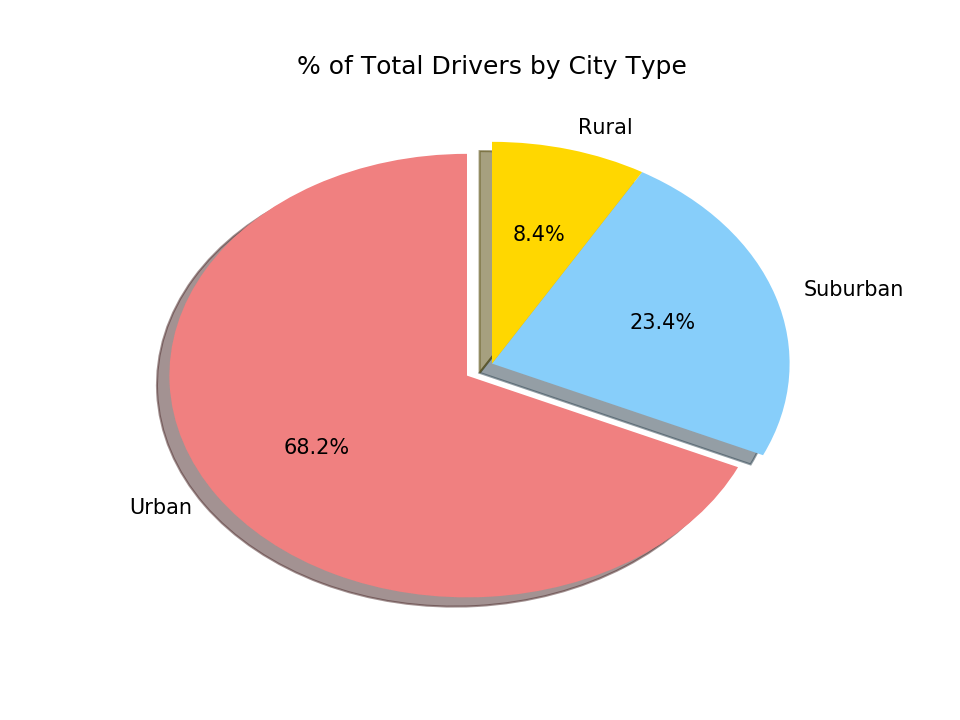

In [218]:
# Calculating $ Displaying Average Fare, date, Total Number of Rides, Total Number of Drivers based on City Type
plt.figure()

pie_analysis_driver = city_ride_data_complete
pie_analysis_driver['rides'] = 0 
pie_analysis_driver['drivers'] = 0
pie_analysis_driver = pie_analysis_driver.groupby(['type']).agg({"fare":"mean"
                                   ,"date":"min"
                                   , "rides":"size"
                                   ,"driver_count":"max"               
                                   ,"type":"min"})
pie_analysis_driver = pie_analysis_driver.rename(columns = {"fare" :"Average Fare"
                                 ,"rides" : "Total Number of Rides"
                                 , "driver_count" : "Total Number of Drivers"
                                 , "type" : "City Type"
                                })
# pie_analysis_driver

In [120]:
#
total_drivers = pie_analysis_driver["Total Number of Drivers"].sum()
# total_drivers
total_urban_drivers = pie_analysis_driver[pie_analysis_driver["City Type"].notnull() & (pie_analysis_driver["City Type"] == "Urban")]
# total_urban_drivers
total_Suburban_drivers = pie_analysis_driver[pie_analysis_driver["City Type"].notnull() & (pie_analysis_driver["City Type"] == "Suburban")]
# total_Suburban_drivers
total_Rural_drivers = pie_analysis_driver[pie_analysis_driver["City Type"].notnull() & (pie_analysis_driver["City Type"] == "Rural")]
# total_Rural_drivers
#
percent_urban_drivers = total_urban_drivers["Total Number of Drivers"] * 100 /total_drivers
# percent_urban_drivers
percent_Suburban_drivers = total_Suburban_drivers["Total Number of Drivers"] * 100 /total_drivers
# percent_Suburban_drivers
percent_Rural_drivers = total_Rural_drivers["Total Number of Drivers"] * 100 /total_drivers
# percent_Rural_drivers

In [219]:
# Labels for the sections of our pie chart

labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [percent_urban_drivers, percent_Suburban_drivers, percent_Rural_drivers]

# The colors of each section of the pie chart
colors = ["lightcoral", "lightskyblue", "gold"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

In [220]:
# Create the pie chart based upon the values above
# Automatically find the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("% of Total Drivers by City Type")

Text(0.5,1,'% of Total Drivers by City Type')

In [221]:
# Tells matplotlib that we want a pie chart with equal axes
# plt.axis("equal")

In [1183]:
# plt.close(figure)
# plt.close("all")